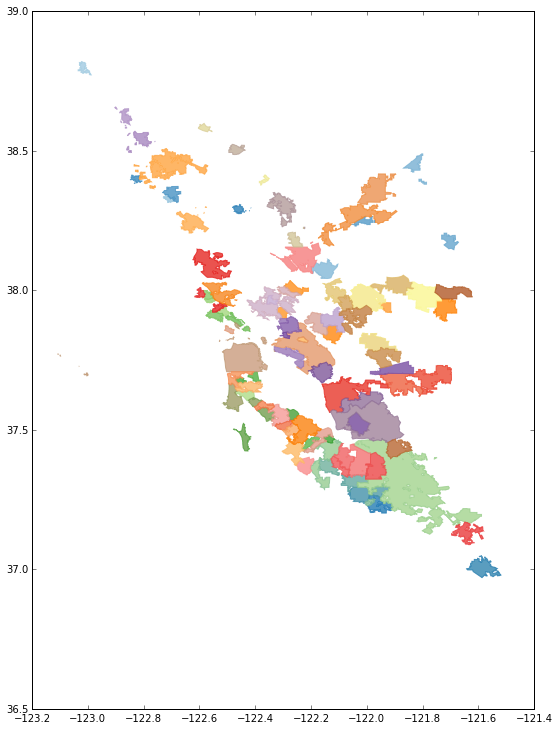

In [2]:
import fiona
from shapely import geometry
from descartes.patch import PolygonPatch#, PathPatch
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

def plot_map(ax, source):
    norm = colors.Normalize(vmin=1, vmax=2*len(source))
    sm = cm.ScalarMappable(norm, cmap=cm.Paired)
    alpha, cnt = .8, 1
    for r in source:
        edge_color, color = sm.to_rgba(cnt), sm.to_rgba(cnt+1)
        cnt += 2
        shape = geometry.shape(r["geometry"])
        if isinstance(shape, geometry.Polygon):
            poly = shape
            ax.add_patch(PolygonPatch(poly, fc=color, ec=edge_color, alpha=alpha, zorder=1))
        elif isinstance(shape, geometry.MultiPolygon):
            for poly in shape:
                ax.add_patch(PolygonPatch(poly, fc=color, ec=edge_color, alpha=alpha, zorder=1))
        elif isinstance(shape, geometry.LineString):
            ax.plot(*shape.xy, color='gray', linewidth=3, solid_capstyle='round', zorder=1)
        elif isinstance(shape, geometry.MultiLineString):
            for line in shape:
                ax.plot(*line.xy, color='gray', linewidth=3, solid_capstyle='round', zorder=1)
        else:
            print r["geometry"]["type"]
            raise Exception("?")

## main ##
plt.rcParams['figure.figsize'] = (9, 16)
fig = plt.figure()
ax = fig.gca()

source_shapefile = "bayarea.map/city_land.shp"
with fiona.open(source_shapefile) as source:
    plot_map(ax, source)

ax.axis('scaled')
plt.show()